<a href="https://colab.research.google.com/github/Roshini1369/customer_seg_analysis/blob/main/oasis_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/ifood_df.csv')

In [3]:
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [4]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [5]:
df.fillna(df.mean(), inplace=True)

In [9]:
print(df.columns.tolist())


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [10]:
print(df.columns[df.columns.str.contains('Annual Income', case=False)])  # Search for "Annual Income"
print(df.columns[df.columns.str.contains('Spending Score', case=False)])  # Search for "Spending Score"


Index([], dtype='object')
Index([], dtype='object')


In [13]:
df.columns = df.columns.str.strip()


In [15]:
print(df.columns[df.columns.str.contains('Income', case=False)])
print(df.columns[df.columns.str.contains('Spending', case=False)])


Index(['Income'], dtype='object')
Index([], dtype='object')


In [16]:
df_segment = df[['Correct_Column_1', 'Correct_Column_2']]


KeyError: "None of [Index(['Correct_Column_1', 'Correct_Column_2'], dtype='object')] are in the [columns]"

In [17]:
df.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [18]:
# Selecting columns for segmentation
df_segment = df[['Income', 'MntTotal']]

# Check the first few rows to ensure correct columns
print(df_segment.head())


    Income  MntTotal
0  58138.0      1529
1  46344.0        21
2  71613.0       734
3  26646.0        48
4  58293.0       407


In [19]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

# Check the scaled data
print(df_segment_scaled[:5])  # Print the first 5 rows of the scaled data


[[ 0.31465086  1.67805628]
 [-0.25487741 -0.94087999]
 [ 0.96535404  0.29738364]
 [-1.20608716 -0.89398922]
 [ 0.32213575 -0.27051567]]


In [20]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

# Check the scaled data
print(df_segment_scaled[:5])  # Print the first 5 rows of the scaled data


[[ 0.31465086  1.67805628]
 [-0.25487741 -0.94087999]
 [ 0.96535404  0.29738364]
 [-1.20608716 -0.89398922]
 [ 0.32213575 -0.27051567]]


In [21]:
from sklearn.cluster import KMeans

# Apply KMeans clustering (let's try 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
df_segment['Cluster'] = kmeans.fit_predict(df_segment_scaled)

# Check the results
print(df_segment.head())


    Income  MntTotal  Cluster
0  58138.0      1529        0
1  46344.0        21        1
2  71613.0       734        2
3  26646.0        48        4
4  58293.0       407        3


<ipython-input-21-708f478ba90e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment['Cluster'] = kmeans.fit_predict(df_segment_scaled)


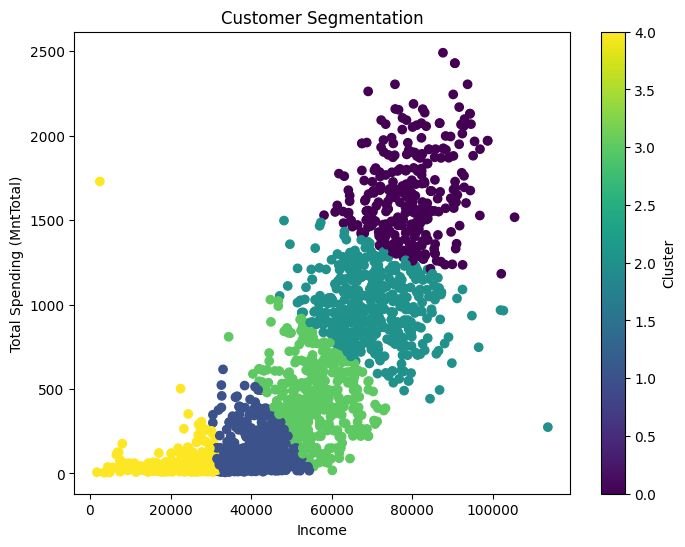

In [22]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_segment['Income'], df_segment['MntTotal'], c=df_segment['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Total Spending (MntTotal)')
plt.colorbar(label='Cluster')
plt.show()


In [23]:
# Group by the cluster and analyze the mean for each feature
cluster_summary = df_segment.groupby('Cluster').mean()

print("Cluster Characteristics:")
print(cluster_summary)


Cluster Characteristics:
               Income     MntTotal
Cluster                           
0        79428.368771  1643.269103
1        40302.691652   121.528109
2        70055.644211   980.456842
3        56108.754217   448.250602
4        22715.540984    54.318501


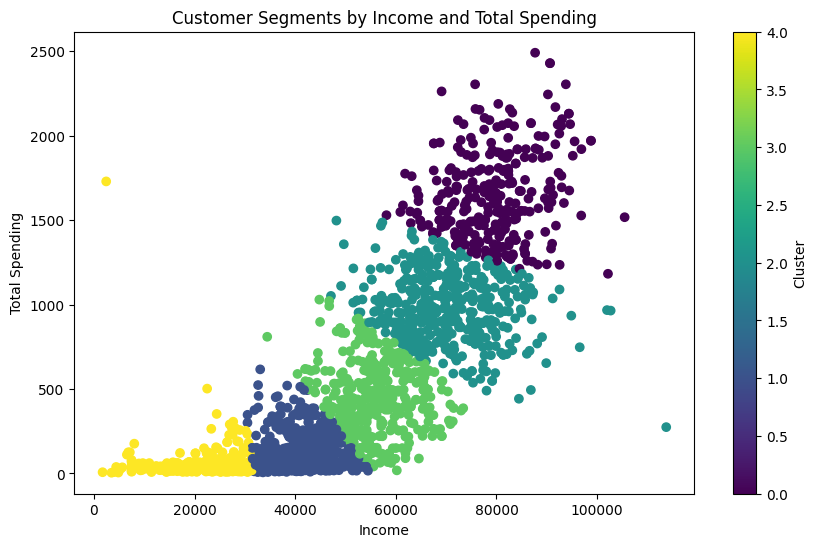

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(df_segment['Income'], df_segment['MntTotal'], c=df_segment['Cluster'], cmap='viridis')
plt.title('Customer Segments by Income and Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.colorbar(label='Cluster')
plt.show()


In [25]:
# Add more features for segmentation
df_segment = df[['Income', 'MntTotal', 'Age', 'MntWines', 'MntMeatProducts']]


In [29]:
from sklearn.cluster import KMeans

# Assuming you have already prepared your features in 'df_segment'
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df_segment['Cluster'] = kmeans.fit_predict(df_segment)

# Check if 'Cluster' is in the dataframe
print(df_segment.head())


    Income  MntTotal  Age  MntWines  MntMeatProducts  Cluster
0  58138.0      1529   63       635              546        2
1  46344.0        21   66        11                6        2
2  71613.0       734   55       426              127        0
3  26646.0        48   36        11               20        1
4  58293.0       407   39       173              118        2


<ipython-input-29-7bc7e01af581>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment['Cluster'] = kmeans.fit_predict(df_segment)


In [30]:
from sklearn.preprocessing import StandardScaler

# Scale the data if needed
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment[['Income', 'MntTotal', 'Age']])  # Example columns to scale

# Calculate silhouette score with the scaled data and cluster assignments
silhouette_avg = silhouette_score(df_segment_scaled, df_segment['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2353229927114469


In [31]:
print(df_segment.columns)


Index(['Income', 'MntTotal', 'Age', 'MntWines', 'MntMeatProducts', 'Cluster'], dtype='object')


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Prepare and scale the data
df_segment = df[['Income', 'MntTotal', 'Age']]  # Adjust with actual column names
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose appropriate number of clusters
df_segment['Cluster'] = kmeans.fit_predict(df_segment_scaled)

# Step 3: Calculate silhouette score
silhouette_avg = silhouette_score(df_segment_scaled, df_segment['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.37099978070459627


<ipython-input-32-53a0245ed6af>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segment['Cluster'] = kmeans.fit_predict(df_segment_scaled)


In [33]:
scaler = StandardScaler()
df_segment_scaled = scaler.fit_transform(df_segment)


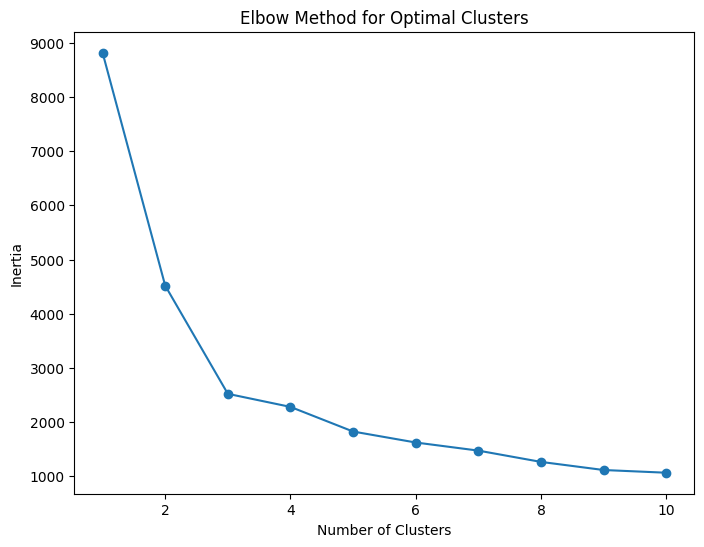

In [35]:
inertia = []
for k in range(1, 11):  # Check for k between 1 and 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_segment_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_segment_scaled)


In [38]:
print(df.columns)


Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'Cluster'],
      dtype='object')


In [39]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
